In [9]:
from library.objective_function import *
from library.optimiser import *
from library.post_analysis import *
%matplotlib inline

In [4]:
class single_experiment:
    def set_objective(self, objective_func):
        self.objective_func = objective_func

    def set_optimizer(self, optimizer):
        self.optimizer = optimizer

    def do(self):
        optimal, optimum, statistics = self.optimizer.optimise(self.objective_func)
        if np.linalg.norm(optimal - self.objective_func.get_optimal()) < 1e-1 \
        or np.linalg.norm(optimum - self.objective_func.get_optimum()) < 1e-1:
            statistics['status'] = 'global minimum'
        elif statistics['status'] != 'diverge':
            statistics['status'] = 'local minimum'
            #print("dist_val", np.linalg.norm(optimum - self.objective_func.get_optimum()))
        #print(statistics['status'])
        if self.optimizer.record == True:
            return statistics['status']
        else:
            self.analyser = post_analysis(statistics, self.objective_func)

In [24]:
class post_analysis_multiple:
    def __init__(self, edge, scale):
        self.edge = edge
        self.scale = scale
    def plot_scatter(self, x, y, res):
        fig = plt.figure(figsize=(10,10))
        sc = plt.scatter(x.ravel(), y.ravel(), c=res.ravel(), marker='o', vmin=0, vmax=1, s=35, cmap='YlGnBu')
        plt.colorbar(sc)
    def plot_hotmap(self, data, mask):
        with sns.axes_style("white"):
            fig = plt.figure(figsize=(13, 13))
            ax = sns.heatmap(data, mask=mask, vmax=1, square=True,  cmap="YlGnBu")
            ax.set_xticklabels(np.arange(0, self.edge, self.scale))
            ax.set_yticklabels(np.arange(self.edge, 0, -self.scale))

# original CMA

In [19]:
#parameter of optimisation
np.random.seed(134)
# setup objective function
ak = ackley()
# setup adjust function optimizer
default = do_nothing()
# setup optmizer
paras = {}
paras['std'] = np.ones((2,)) * 3
paras['tol'] = 1e-5
paras['adjust_func'] = default
paras['record'] = True
paras['verbose'] = False
cma = cma_es()

# boil down to one expreiment
exp = single_experiment()
exp.set_objective(ak)


# parameters of sample area
edge = 100
scale = 5
size = 20
num = int(edge / scale)
# initlise matrix to record results
avg_res1 = np.zeros((num, num))
mask1 = np.ones_like(avg_res1, dtype=np.uint8)
position_x1 = np.zeros_like(avg_res1)
position_y1 = np.zeros_like(avg_res1)

for i, x in enumerate(np.arange(0, edge, scale)):
    for j, y in enumerate(np.arange(0, x + scale, scale)):
        points = np.random.rand(size, 2) * scale + np.array([x, y]) 
        mask1[num-1-j, i] = 0
        position_x1[num-1-j, i] = x
        position_y1[num-1-j, i] = y
        
        # calculate the probility of getting global minimum 
        res = np.zeros((size, ))
        for k in range(size):
            paras['mean0'] = points[k].reshape(2,1)
            cma.set_parameters(paras)
            exp.set_optimizer(cma)
            status = exp.do()
            if(status == 'global minimum'):
                res[k] = 1
            else:
                res[k] = 0
        avg_res1[num-1-j, i] = np.mean(res)

diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!


In [25]:
ana = post_analysis_multiple(edge, scale)

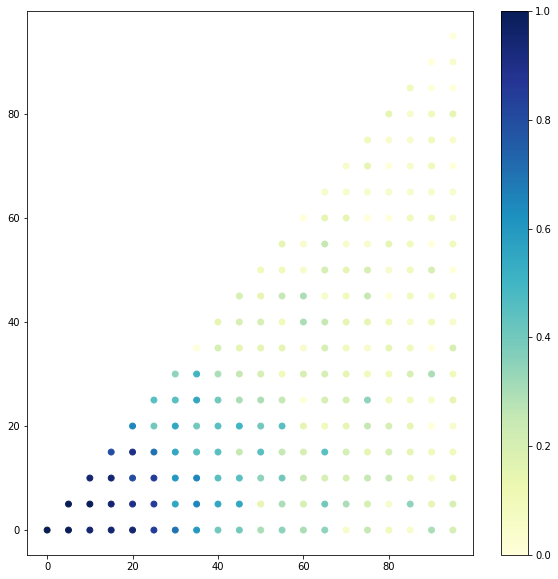

In [26]:
ana.plot_scatter(position_x1, position_y1, avg_res1)
#plt.savefig('scatter_roundOff.png')

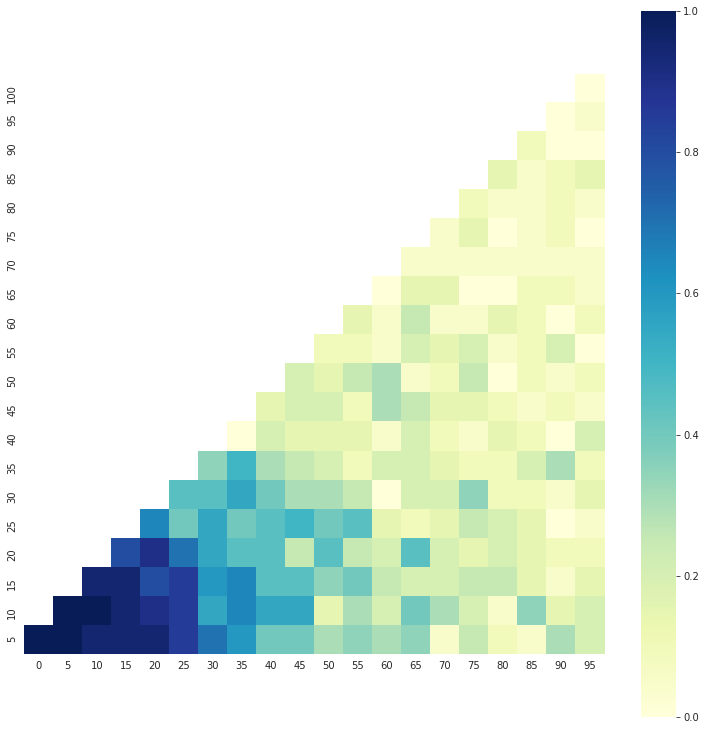

In [27]:
ana.plot_hotmap(avg_res1, mask1)
#plt.savefig('hotmap_roundOff.png')

In [31]:
np.set_printoptions(linewidth=150)

In [33]:
avg_res1[3:, 3:]

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.05, 0.1 , 0.15],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.05, 0.05, 0.1 , 0.05],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.15, 0.  , 0.05, 0.1 , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.15, 0.  , 0.  , 0.1 , 0.1 , 0.05],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.05, 0.25, 0.05, 0.05, 0.15, 0.1 , 0.  , 0.1 ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.1 , 0.05, 0.2 , 0.15, 0.2 , 0.05, 0.1 , 0.2 , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.15, 0.25, 0.3 , 0.05, 0.1 , 0.25, 0.  , 0.1 , 0.05, 0.1 ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.2 , 0.2 , 0.1 , 0.3 , 0.25, 0.15, 0.15, 0.1 , 0.05, 0.1 , 0.05],
 

In [ ]:
np.save('results_ackley_original_cma.npy', avg_res1)

# CMA with line search

In [34]:
#parameter of optimisation
np.random.seed(134)
# setup objective function
ak = ackley()
# setup adjust function optimizer
ro = round_off()
# setup optmizer
paras = {}
paras['std'] = np.ones((2,)) * 3
paras['tol'] = 1e-5
paras['adjust_func'] = ro
paras['record'] = True
paras['verbose'] = False
cma = cma_es()

# boil down to one expreiment
exp = single_experiment()
exp.set_objective(ak)


# parameters of sample area
edge = 500
scale = 10
size = 20
num = int(edge / scale)
# initlise matrix to record results
avg_res2 = np.zeros((num, num))
mask = np.ones_like(avg_res, dtype=np.uint8)
position_x = np.zeros_like(avg_res)
position_y = np.zeros_like(avg_res)

for i, x in enumerate(np.arange(0, edge, scale)):
    for j, y in enumerate(np.arange(0, x + scale, scale)):
        points = np.random.rand(size, 2) * scale + np.array([x, y]) 
        mask[num-1-j, i] = 0
        position_x[num-1-j, i] = x
        position_y[num-1-j, i] = y
        
        # calculate the probility of getting global minimum 
        res = np.zeros((size, ))
        for k in range(size):
            paras['mean0'] = points[k].reshape(2,1)
            cma.set_parameters(paras)
            exp.set_optimizer(cma)
            status = exp.do()
            if(status == 'global minimum'):
                res[k] = 1
            else:
                res[k] = 0
        avg_res2[num-1-j, i] = np.mean(res)

diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, concentrate in low dimension manifold
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, concentrate in low dimension manifold
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, concentrate in low dimension manifold
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, concentrate in low dimension manifold
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, concentrate in low dimension manifold
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!

In [35]:
np.save('results_ackley_line_cma.npy', avg_res)

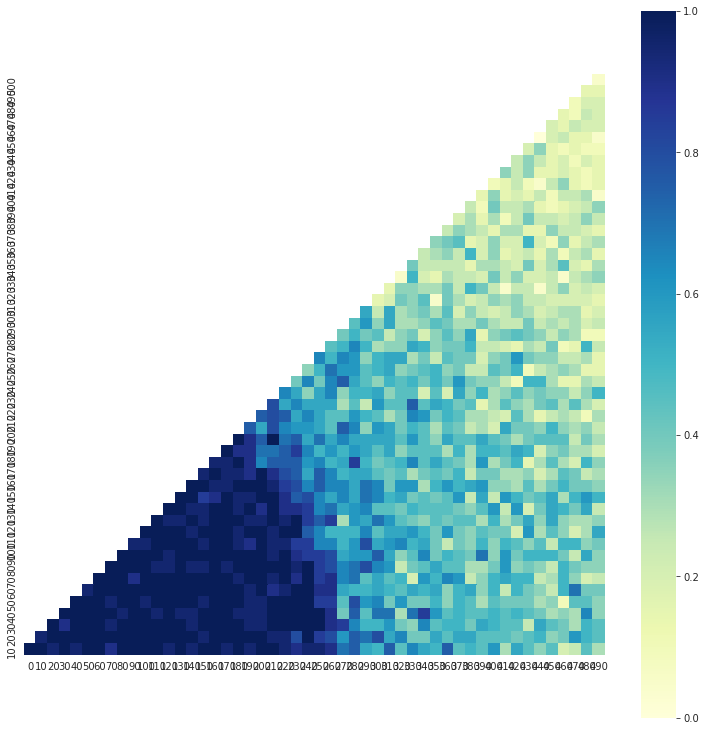

In [39]:
ana = post_analysis_multiple(edge, scale)
ana.plot_hotmap(avg_res, mask)
plt.savefig('hotmap_ackley_roundOff.png')

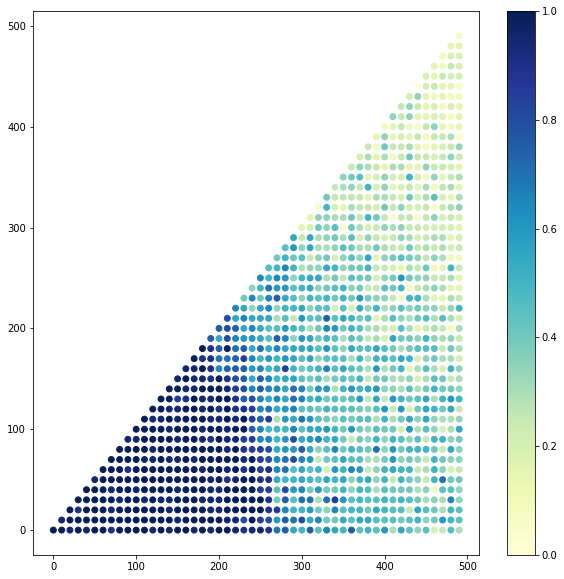

In [41]:
ana.plot_scatter(position_x, position_y, avg_res)
plt.savefig('scatter_ackley_roundOff.png')

# tuned Ackley
## original CMA

In [67]:
#parameter of optimisation
np.random.seed(134)
# setup objective function
tak = tuned_ackley()
# setup adjust function optimizer
default = do_nothing()
# setup optmizer
paras = {}
paras['std'] = np.ones((2,)) * 3
paras['tol'] = 1e-5
paras['adjust_func'] = default
paras['record'] = True
paras['verbose'] = False
cma = cma_es()

# boil down to one expreiment
exp = single_experiment()
exp.set_objective(tak)


# parameters of sample area
edge = 20
scale = 1
size = 20
num = int(edge / scale)
# initlise matrix to record results
avg_res3 = np.zeros((num, num))
mask3 = np.ones_like(avg_res3, dtype=np.uint8)
position_x3 = np.zeros_like(avg_res3)
position_y3 = np.zeros_like(avg_res3)

for i, x in enumerate(np.arange(0, edge, scale)):
    for j, y in enumerate(np.arange(0, x + scale, scale)):
        points = np.random.rand(size, 2) * scale + np.array([x, y]) 
        mask3[num-1-j, i] = 0
        position_x3[num-1-j, i] = x
        position_y3[num-1-j, i] = y
        
        # calculate the probility of getting global minimum 
        res = np.zeros((size, ))
        for k in range(size):
            paras['mean0'] = points[k].reshape(2,1)
            cma.set_parameters(paras)
            exp.set_optimizer(cma)
            status = exp.do()
            if(status == 'global minimum'):
                res[k] = 1
            else:
                res[k] = 0
        avg_res3[num-1-j, i] = np.mean(res)

In [68]:
np.save('results_tuned_ackley_original_cma.npy', avg_res3)

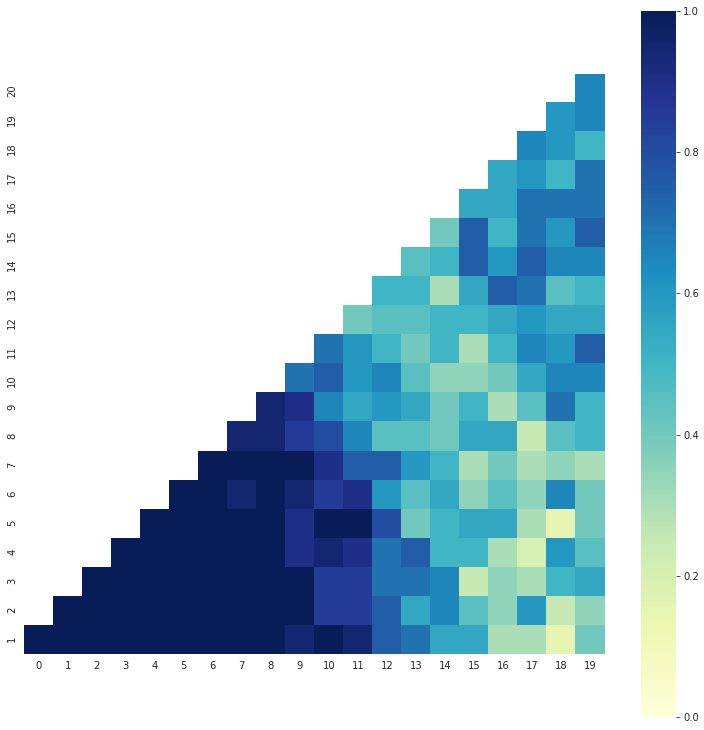

In [69]:
ana = post_analysis_multiple(edge, scale)
ana.plot_hotmap(avg_res3, mask3)
plt.savefig('hotmap_tuned_ackley_cma.png')

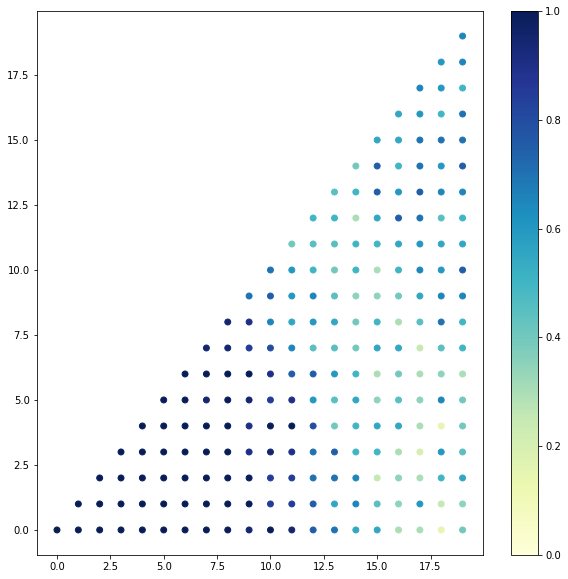

In [70]:
ana.plot_scatter(position_x3, position_y3, avg_res3)
plt.savefig('scatter_tuned_ackley_cma.png')

In [71]:
avg_res3[3:,3:]

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.55, 0.6 , 0.5 , 0.7 ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.55, 0.55, 0.7 , 0.7 , 0.7 ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.4 , 0.75, 0.5 , 0.7 , 0.6 , 0.75],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.45, 0.5 , 0.75, 0.6 , 0.75, 0.65, 0.65],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.5 , 0.3 , 0.55, 0.75, 0.7 , 0.45, 0.5 ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.4 , 0.45, 0.45, 0.5 , 0.5 , 0.55, 0.6 , 0.55, 0.55],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.7 , 0.6 , 0.5 , 0.4 , 0.5 , 0.3 , 0.5 , 0.65, 0.6 , 0.75],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.7 , 0.75, 0.6 , 0.65, 0.45, 0.35, 0.35, 0.4 , 0.55, 0.65, 0.65],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.95, 0.9 , 0.65, 0.55, 0.6 , 0.55, 0.4 , 0.5 , 0.3 , 0.45, 0.7 , 0.5 ],
 

## line search CMA

In [73]:
#parameter of optimisation
np.random.seed(134)
# setup objective function
tak = tuned_ackley()
# setup adjust function optimizer
ro = round_off()
# setup optmizer
paras = {}
paras['std'] = np.ones((2,)) * 3
paras['tol'] = 1e-5
paras['adjust_func'] = ro
paras['record'] = True
paras['verbose'] = False
cma = cma_es()

# boil down to one expreiment
exp = single_experiment()
exp.set_objective(tak)


# parameters of sample area
edge = 20
scale = 0.5
size = 10
num = int(edge / scale)
# initlise matrix to record results
avg_res4 = np.zeros((num, num))
mask4 = np.ones_like(avg_res4, dtype=np.uint8)
position_x4 = np.zeros_like(avg_res4)
position_y4 = np.zeros_like(avg_res4)

for i, x in enumerate(np.arange(0, edge, scale)):
    for j, y in enumerate(np.arange(0, x + scale, scale)):
        points = np.random.rand(size, 2) * scale + np.array([x, y]) 
        mask4[num-1-j, i] = 0
        position_x4[num-1-j, i] = x
        position_y4[num-1-j, i] = y
        
        # calculate the probility of getting global minimum 
        res = np.zeros((size, ))
        for k in range(size):
            paras['mean0'] = points[k].reshape(2,1)
            cma.set_parameters(paras)
            exp.set_optimizer(cma)
            status = exp.do()
            if(status == 'global minimum'):
                res[k] = 1
            else:
                res[k] = 0
        avg_res4[num-1-j, i] = np.mean(res)

/Users/huajian/Non-convex/library/optimiser.py:189: RuntimeWarning:

invalid value encountered in sqrt

/Users/huajian/miniconda3/envs/ada/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning:

invalid value encountered in reduce

/Users/huajian/Non-convex/library/optimiser.py:84: RuntimeWarning:

invalid value encountered in less

/Users/huajian/Non-convex/library/optimiser.py:87: RuntimeWarning:

invalid value encountered in less



diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!


In [74]:
np.save('results_tuned_ackley_line_cma.npy', avg_res4)

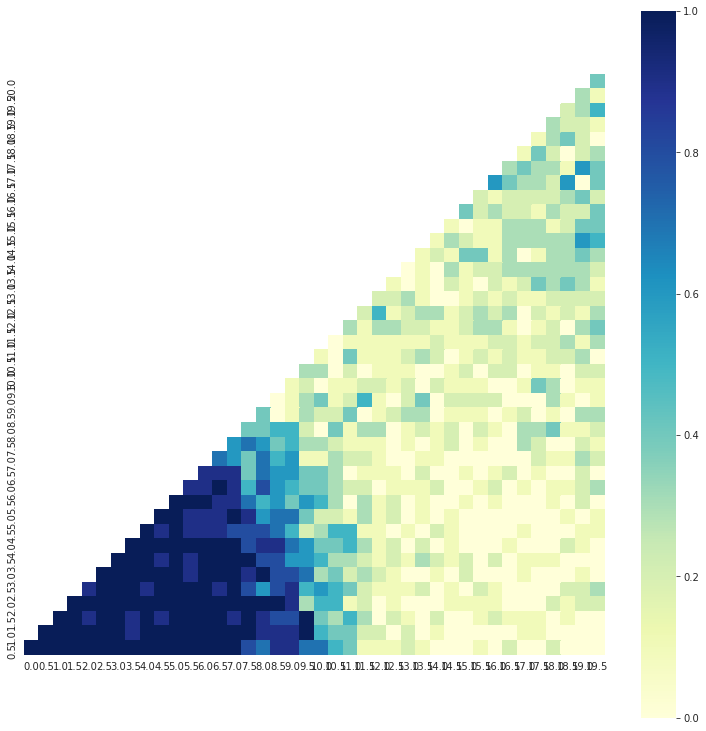

In [75]:
ana = post_analysis_multiple(edge, scale)
ana.plot_hotmap(avg_res4, mask4)
plt.savefig('hotmap_tuned_ackley_line_cma.png')

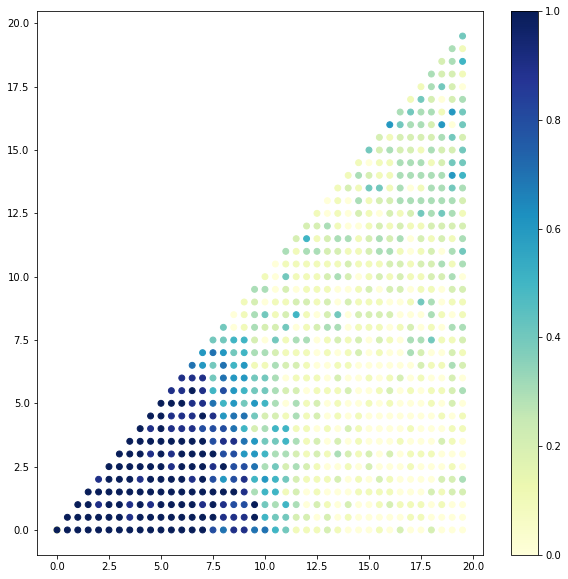

In [76]:
ana.plot_scatter(position_x4, position_y4, avg_res4)
plt.savefig('scatter_tuned_ackley_cma.png')

In [87]:
for i in np.arange(0,20,1):
    print(i, tak.func([i, 0]))

0 2.718281828459045
1 5.355704189294212
2 7.643775799213534
3 9.624452758284127
4 11.331032382291783
5 12.788950954842774
6 14.016476274667031
7 15.025308872169063
8 15.821103939611586
9 16.40392443094477
10 16.768634408391144
11 16.905240515838084
12 16.799188419895835
13 16.431620157330144
14 15.779597544402144
15 14.816296123754235
16 13.511173534248867
17 11.830115676773094
18 9.7355636042004
19 7.186623677541611


# Bukin 
## original CMA

In [ ]:
#parameter of optimisation
np.random.seed(134)
# setup objective function
bk = bbukinin()
# setup adjust function optimizer
ro = round_off()
# setup optmizer
paras = {}
paras['std'] = np.ones((2,)) * 0.0001
paras['tol'] = 1e-5
paras['adjust_func'] = ro
paras['record'] = True
paras['verbose'] = False
cma = cma_es()

# boil down to one expreiment
exp = single_experiment()
exp.set_objective(bk)


# parameters of sample area
edge = 20
scale = 0.5
size = 10
num = int(edge / scale)
# initlise matrix to record results
avg_res5 = np.zeros((num, num))
mask5 = np.ones_like(avg_res5, dtype=np.uint8)
position_x5 = np.zeros_like(avg_res5)
position_y5 = np.zeros_like(avg_res5)

for i, x in enumerate(np.arange(0, edge, scale)):
    for j, y in enumerate(np.arange(0, edge, scale)):
        points = np.random.rand(size, 2) * scale + np.array([x, y]) 
        mask5[num-1-j, i] = 0
        position_x5[num-1-j, i] = x
        position_y5[num-1-j, i] = y
        
        # calculate the probility of getting global minimum 
        res = np.zeros((size, ))
        for k in range(size):
            paras['mean0'] = points[k].reshape(2,1)
            cma.set_parameters(paras)
            exp.set_optimizer(cma)
            status = exp.do()
            if(status == 'global minimum'):
                res[k] = 1
            else:
                res[k] = 0
        avg_res5[num-1-j, i] = np.mean(res)

## line search CMA